
# <font color=blue><div align="center">Data processing</div></font>

# Data importation

In [1]:
import pandas as pd
import numpy as np 
import math as mt 
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import twitter_samples 
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
import seaborn as sns


## <font color=red><div align="left">Training Data</div></font>

In [2]:
training_path = "../tweet-sentiment-extraction/train.csv"
Train_df = pd.read_csv(training_path)

In [3]:
Train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


## <font color= "red"><div align = "left"> Test Data</div></font>

In [4]:
test_path = "../tweet-sentiment-extraction/test.csv"
Test_df = pd.read_csv(test_path)

In [5]:
Test_df

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive



<font color= "green"><div align = "left"> Checking if there are NAN values in the data</div></font>

In [6]:
Train_df[Train_df.isna().any(axis = 1)]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [7]:
Train_df = Train_df.dropna()

In [8]:
Test_df[Test_df.isna().any(axis = 1)]

,textID,text,sentiment


<font color = "green"><div align = "left"> Keeping the interesting rows (getting rid of textID) </div></font>

In [9]:
Train_df = Train_df.drop(columns = ["textID"])

In [10]:
Train_df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [11]:
Test_df = Test_df.drop(columns = ["textID"])

In [12]:
Test_df.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


<font color = "green"><div elign = "left">Data visualization</font></div>

In [13]:
positive_tweets = Train_df[Train_df["sentiment"] == "positive"]
negative_tweets = Train_df[Train_df["sentiment"] == "negative"]
neutral_tweets = Train_df[Train_df["sentiment"] == "neutral"]

In [14]:
print('Number of positive tweets: ', len(positive_tweets))
print('Number of negative tweets: ', len(negative_tweets))
print('Number of neutral tweets: ', len(neutral_tweets))

Number of positive tweets:  8582
Number of negative tweets:  7781
Number of neutral tweets:  11117


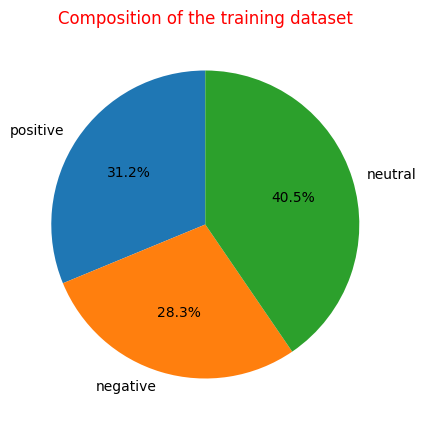

In [15]:
# creating the figure

fig = plt.figure(figsize = (5,5))

# Labels 

labels = "positive" , "negative", "neutral"

# Size of each slide

sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]

# Creating a pie plot

plt.pie(sizes, labels = labels,  autopct='%1.1f%%', startangle=90)

# Title of the fig

plt.title("Composition of the training dataset", color = "red")

# Showing the plot

plt.show()

<font color = "green"><div align = "left"> Data processing (Tokenizing the string
• Lowercasing
• Removing stop words and punctuation
• Stemming) </div></font>

In [16]:
import re # library for regular expression␣operations
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
import random

In [17]:
tweet = positive_tweets.iloc[random.randint(0,5000)]["text"]
tweet

' Awww!!'

In [18]:
print('\033[92m' + tweet)
print('\033[94m')
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)


 Awww!!

 Awww!!


In [19]:
#Tokenization function 

def tokens(words):
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
    reduce_len=True)
    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(words)
    return tweet_tokens

In [20]:
tokenized_tweet = tokens(tweet2)

In [21]:
print(tweet2 + "\ntokenized_version ====>  \n" + str(tokenized_tweet))

 Awww!!
tokenized_version ====>  
['awww', '!', '!']


In [22]:
def cleaning_tweet(tweet):
    tweet2= re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet2 = re.sub(r'#', '', tweet2)
    return tweet2

In [23]:
#stopwords represnt a dictionnary (english words)

nltk.download("stopwords")
stopwords_english = stopwords.words('english')
stopwords_punctuation = string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mrabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Removing stopwords and punctuation
def remove_stopwords_punctuation(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
    return tweets_clean

In [25]:
clean_tweet_tokenized = remove_stopwords_punctuation(tokenized_tweet)
clean_tweet_tokenized

['awww']

In [26]:
def stemming(tweet_clean_tokenized):
    # Instantiate stemming class
    stemmer = PorterStemmer()
    # Create an empty list to store the stems
    tweets_stem = []
    for word in tweet_clean_tokenized:
        stem_word = stemmer.stem(word) # stemming word
        tweets_stem.append(stem_word) # append to the list
    return tweets_stem
    

In [27]:
stemmed_tweet = stemming(clean_tweet_tokenized)
stemmed_tweet

['awww']

In [28]:
def process_tweet(tweet):
    clear_text = cleaning_tweet(tweet)
    tokenized = tokens(clear_text)
    clean_tweet = remove_stopwords_punctuation(tokenized)
    processed_tweet = stemming(clean_tweet)
    return processed_tweet

In [29]:
print("processed tweet : \n" + str(process_tweet(tweet2)))

processed tweet : 
['awww']


In [30]:
#Normalizing and cleaning the rows (Training Data)

Train_df["text_clear"] = Train_df["text"].apply(process_tweet)
Train_df["selected_text_clear"] = Train_df["selected_text"].apply(process_tweet)

In [31]:
#Normalizing and cleaning the rows (Test Data)

Test_df["text_clear"] = Test_df["text"].apply(process_tweet)

In [32]:
Train_df = Train_df.reset_index()
Train_df.head()

,index,text,selected_text,sentiment,text_clear,selected_text_clear
0,0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[respond, go]","[respond, go]"
1,1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]","[sooo, sad]"
2,2,my boss is bullying me...,bullying me,negative,"[boss, bulli, ...]",[bulli]
3,3,what interview! leave me alone,leave me alone,negative,"[interview, leav, alon]","[leav, alon]"
4,4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[son, put, releas, alreadi, bought]",[son]


In [33]:
Test_df = Test_df.reset_index()
Test_df.head()

,index,text,sentiment,text_clear
0,0,Last session of the day http://twitpic.com/67ezh,neutral,"[last, session, day]"
1,1,Shanghai is also really exciting (precisely -...,positive,"[shanghai, also, realli, excit, precis, skyscr..."
2,2,"Recession hit Veronique Branquinho, she has to...",negative,"[recess, hit, veroniqu, branquinho, quit, comp..."
3,3,happy bday!,positive,"[happi, bday]"
4,4,http://twitpic.com/4w75p - I like it!!,positive,[like]
